# 1. Frame the problem and look at the big picture

1. Define the object in business term

The problem of home credit default risk: People with low or non-existing credit histories are taken advantage of by untrustworthy lenders.

2. How will your solution be used?

To determine whether an applicant of a loan will be able to repay it.

3. What are the current solutions/workarounds?

We will be using supervised learning because we have many attributes inputs and outputs a boolean value to determine if they will repay their loan. Our model will learn from this data and predict whether or not the applicants will pay their loan.

4. How should you frame this problem?

By using classification. We have a binary variable, 0 and 1. 0 if they will pay the loan in time, and 1 will have problems paying the loan.

5. How should performance be measured?

The performance will be measured by looking at the accuracy of our data compared to the test set.

6. Is the performance measure aligned with the business objective?

7. What will be the minimum performance needed to reach the business objective?

8. What are the comparable problems? Can you reuse the experimence or tools?

9. Is human expertise available?

10. How would you solve the problem manually?

11. List the assumptions we have made so far.

12. Verify assumptions if possible.

# 2. Get the data

In [1]:
import pandas as pd
import os

In [2]:
#List files 
print(os.listdir('home-credit-default-risk/'))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
#Training data and test data
train_data = pd.read_csv('home-credit-default-risk/application_train.csv')
test_data = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Training data dimensions: ', train_data.shape)
train_data.head()

Training data dimensions:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('Testing data dimensions: ', test_data.shape)
test_data.head()

Testing data dimensions:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The test set is the smaller set of the train set, and also dont include the target column. This is is because the test set should not include the predictions we are going to make.

# 3. Explore the data

In [5]:
import matplotlib.pyplot as plt

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Target attributes

In [8]:
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

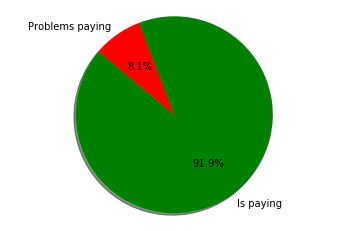

In [9]:
# Data to plot
labels = 'Is paying', 'Problems paying'
sizes = [train_data['TARGET'].value_counts()[0],train_data['TARGET'].value_counts()[1]]
colors = ['green', 'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Missing values

In [10]:
#We need a function to test if there are any null-values
def missing_values(dataframe):
    #Sum of total missing values
    mis_val = dataframe.isnull().sum() #count the null-values in the dataframe
    
    #Percentage of the sum
    per_val = 100 * mis_val / len(dataframe)
    
    #Visualize the results
    tab_val = pd.concat([mis_val, per_val], axis=1) #concatinate the values together
    
    #Name the columns
    mis_val_columns = tab_val.rename(columns = {0 : 'Missing values', 
                                      1 : 'Percent of total values'})
    #Sort the table
    mis_val_columns = mis_val_columns[mis_val_columns.iloc[:,1] != 0].sort_values(
        'Percent of total values', ascending=False).round(1) ##COMMENT
    
    #Print information
    print("The selected dataframe has " + str(dataframe.shape[1]) + " columns.\n"
          "There are " + str(mis_val_columns.shape[0]) + " columns that have missing values.")
    
    return mis_val_columns

In [11]:
missing_values = missing_values(train_data)
missing_values.head(10)

The selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing values,Percent of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Visualize the data

In [12]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e3abdd0>,
      dtype=object)

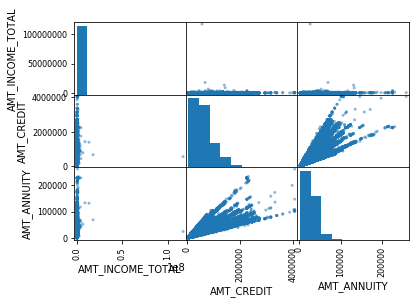

In [13]:
attributes = ["AMT_INCOME_TOTAL", "AMT_CREDIT",
             "AMT_ANNUITY"]
scatter_matrix(train_data[attributes])

## Correlation between attributes

# 4. Prepare the data

## Checking the datatypes

In [14]:
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Visualize every columns with objects and how many objects it contains

In [15]:
train_data.select_dtypes('object').apply(pd.Series.nunique,axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

## LabelEncoder under 2 unique categories

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
count = 0

#Iterate through the table
for col in train_data:
    #If the column datatype is an object
    if train_data[col].dtype == 'object': 
        
        if len(list(train_data[col].unique())) <= 2: #WHY
            
            encoder.fit(train_data[col]) #fit the data
            train_data[col] = encoder.transform(train_data[col]) #transform the train set
            test_data[col] = encoder.transform(test_data[col]) #transform the test set
            
            
            count += 1 #add 1 to count each column that were encoded
        
print(str(count) + ' columns were label encoded.')

3 columns were label encoded.


## OneHotEncoder over 2 unique categories

In [17]:
#Indicating it exists objects in the columns
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

print('Training Features shape: ', train_data.shape)
print('Test Features shape: ', test_data.shape)

Training Features shape:  (307511, 243)
Test Features shape:  (48744, 239)


## Align train and test

In [18]:
train_labels = train_data['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

# Add the target back in
train_data['TARGET'] = train_labels

print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Exploratory data analysis

In [19]:
train_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

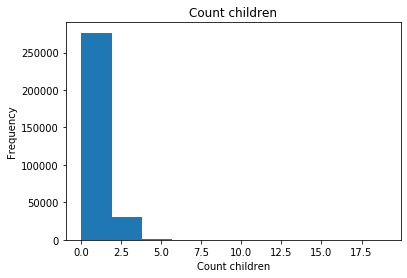

In [21]:
train_data['CNT_CHILDREN'].plot.hist(title = 'Count children');
plt.xlabel('Count children');

19 children seems a lot, but it is possible. 19 children is an outlier.

In [32]:
anom = train_data[train_data['CNT_CHILDREN'] >= 15]
non_anom = train_data[train_data['CNT_CHILDREN'] != 19]
print('The non anomalies default on %0.2f%% of counts' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of counts' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous children counts' % len(anom))

The non anomalies default on 8.07% of counts
The anomalies default on 0.00% of counts
There are 2 anomalous children counts


Strange!

In [24]:
train_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Maxiumum value is almost a 1000 years. How many of those are outliers?

In [36]:
anom = train_data[train_data['DAYS_EMPLOYED'] == 365243]
non_anom = train_data[train_data['DAYS_EMPLOYED'] != 365243]
print('The non anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


There are 55374 anomalous values, we can change the values to NAN. We need to state if it are anomality or not. We add a column with a boolean value, indicating wether or not the value is anomalous.

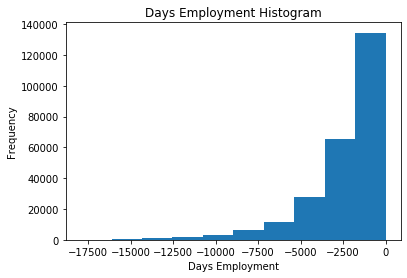

In [45]:
import numpy as np
train_data['DAYS_EMPLOYED_ANOM'] = train_data["DAYS_EMPLOYED"] == 365243

#replaces the anomalities with nan
train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
#plot
train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Comment

In [46]:
test_data['DAYS_EMPLOYED_ANOM'] = test_data["DAYS_EMPLOYED"] == 365243

#replaces the anomalities with nan
test_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_data['DAYS_EMPLOYED_ANOM'].sum(), len(test_data)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlation

In [48]:
correlations = train_data.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

We can see the correlations between days_birth and target is the highest positive correlation. But DAYS_BIRTH has a negative value, meaning when the clients gets older, they are less likely to default.

In [70]:
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
train_data['DAYS_BIRTH'].corr(train_data['TARGET'])

-0.07823930830982712

Now that we have taken the absolute value of days birth, we have acquired a negative correlation between target and days birth. This means that the older the client is, the more likely the client is to pay the loan.

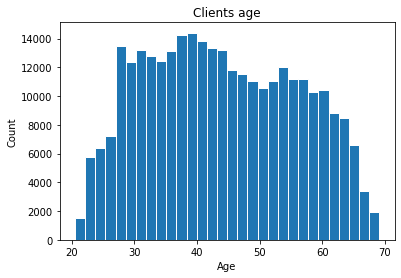

In [62]:
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor='white', bins= 30)
plt.title('Clients age'); 
plt.xlabel('Age');
plt.ylabel('Count');

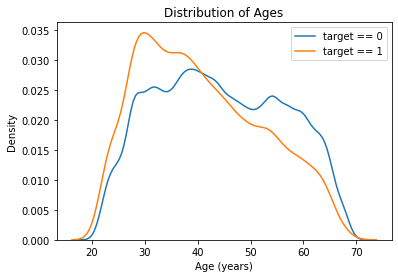

In [65]:
import seaborn as sns
#Kernel density plot
#display all days birth with target = 0
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
#display all days birth with target = 1
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

We can see that clients in the age up to 40 has more problems paying their loans, while clients over 40 is more evenly distributed.

/Users/fredrikgarsegmork/anaconda3/envs/dat158/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fredrikgarsegmork/anaconda3/envs/dat158/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


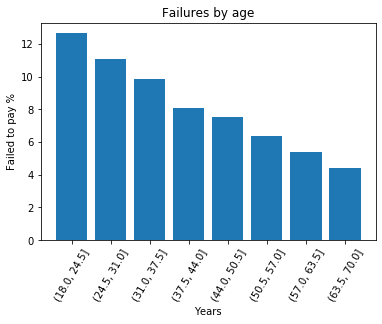

In [69]:
#Separate the data
age_data = train_data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
#store in 7 years span
age_data['YEARS_SPAN'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(18, 70, num = 9))

#group the data
age_group = age_data.groupby('YEARS_SPAN').mean()

#barchart
plt.bar(age_group.index.astype(str), 100 * age_group['TARGET'])

#plot 
plt.xticks(rotation = 60);
plt.xlabel('Years');
plt.ylabel('Failed to pay %');
plt.title('Failures by age');


This shows that younger the people, the higher possibility of not repaying their loans.

In [75]:
ext_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


/Users/fredrikgarsegmork/anaconda3/envs/dat158/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fredrikgarsegmork/anaconda3/envs/dat158/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


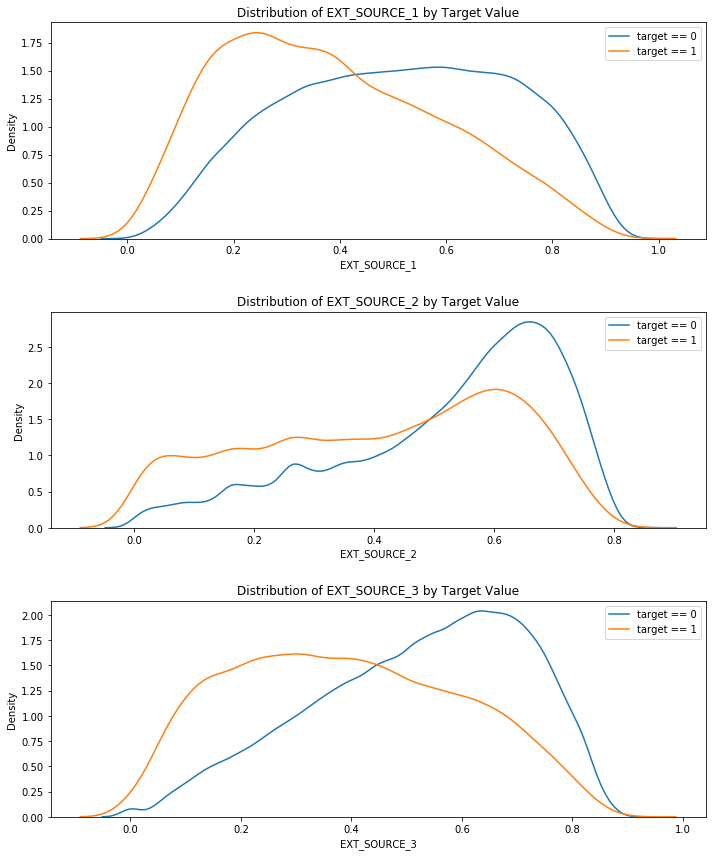

In [72]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

Found already plotted external sources 1-3 and can see the correlation between this and failure to pay.

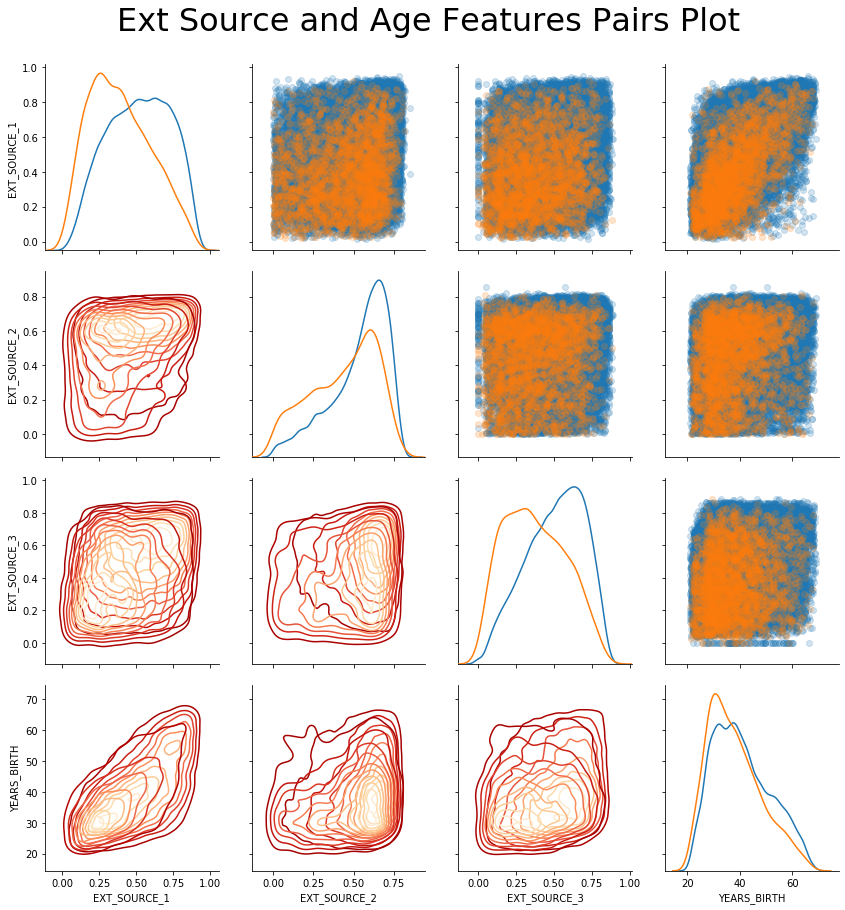

In [78]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

## Polynomial Features

In [81]:
# Make a new dataframe for polynomial features
poly_features = train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [82]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [83]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [88]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_data['SK_ID_CURR']
train_poly = train_data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_data['SK_ID_CURR']
test_poly = test_data.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


# 5. Short-List Promising Models 

Using minmax scaler

In [96]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test_data)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

/Users/fredrikgarsegmork/anaconda3/envs/dat158/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [99]:
# Submission dataframe
submit = test_data[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

/Users/fredrikgarsegmork/anaconda3/envs/dat158/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


In [100]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

# 6. Fine tune the system

# 7. Present your solution

# 8. Launch, monitor and maintain your system